In [ ]:
try:
  import jax
except:
  %pip install -qq jax
  import jax

try:
  import distrax
except:
  %pip install -qq distrax
  import distrax

try:
  import matplotlib.pyplot as plt
except:
  %pip install -qq matplotlib.pyplot
  import matplotlib.pyplot as plt

In [ ]:
l = 10  # length of chain
n = 1  # number of samples
k = 3  # number of states in sample
p = 3  # possible outcomes
pi = jax.numpy.array([0.5, 0.3, 0.2])  # prior matrix of k
A = jax.numpy.array(
    [[0.5, 0.4, 0.1], [0.1, 0.8, 0.1], [0.4, 0.3, 0.3]]
)  # transition matrix of k*k
B = jax.numpy.array(
    [[0.5, 0.25, 0.25], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]
)  # emission matrix of k*p


In [3]:
def state(t):
    result = []
    for i in range(k):
        sum = 0
        for j in range(k):
            sum += t[j] * A[j][i]
        result.append(sum)
    return result


def out(st):
    result = []
    for i in range(k):
        sum = 0
        for j in range(k):
            sum += st[j] * B[j][i]
        result.append(sum)
    return result


In [4]:
for i in range(n):
    sample = []
    outcome = []
    z1 = pi
    sample.append(z1)
    otc = out(z1)
    outcome.append(otc)
    zi = z1
    for j in range(l - 1):
        zi_1 = state(zi)
        sample.append(zi_1)
        otc = out(zi_1)
        outcome.append(otc)
        zi = zi_1

    print(sample)
    print(outcome)


[DeviceArray([0.5, 0.3, 0.2], dtype=float32), [DeviceArray(0.36, dtype=float32), DeviceArray(0.5, dtype=float32), DeviceArray(0.14, dtype=float32)], [DeviceArray(0.286, dtype=float32), DeviceArray(0.586, dtype=float32), DeviceArray(0.128, dtype=float32)], [DeviceArray(0.25280002, dtype=float32), DeviceArray(0.62160003, dtype=float32), DeviceArray(0.12560001, dtype=float32)], [DeviceArray(0.23880002, dtype=float32), DeviceArray(0.6360801, dtype=float32), DeviceArray(0.12512001, dtype=float32)], [DeviceArray(0.23305602, dtype=float32), DeviceArray(0.64192015, dtype=float32), DeviceArray(0.12502402, dtype=float32)], [DeviceArray(0.23072964, dtype=float32), DeviceArray(0.6442658, dtype=float32), DeviceArray(0.12500483, dtype=float32)], [DeviceArray(0.22979333, dtype=float32), DeviceArray(0.6452059, dtype=float32), DeviceArray(0.125001, dtype=float32)], [DeviceArray(0.22941765, dtype=float32), DeviceArray(0.6455824, dtype=float32), DeviceArray(0.12500022, dtype=float32)], [DeviceArray(0.229

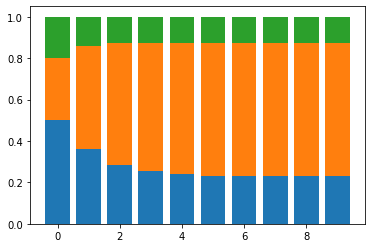

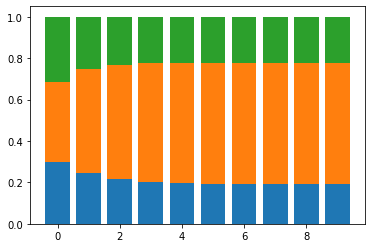

In [5]:
for i in range(l):
    s = 0
    for j in range(k):
        plt.bar(i, sample[i][j], bottom=s, color="C" + str(j))
        s += sample[i][j]
plt.show()

for i in range(l):
    s = 0
    for j in range(p):
        plt.bar(i, outcome[i][j], bottom=s, color="C" + str(j))
        s += outcome[i][j]
